In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Modelowanie zużycia energii elektrycznej na 1 mieszkańca w kWH w zależności od wybranych czynników

##### Wczytanie danych

In [2]:
data = pd.read_excel('./dane/dane_zuzycie_energii.xlsx', sheet_name='Sheet1')
data.index = pd.RangeIndex(start=1, stop=43, step=1)
data.index.name = 'Observation No.'
data

,Powiat,Y - zużycie energii elektrycznej na 1 mieszkańca [kWh],X1 - przeciętna liczba osób na 1 mieszkanie [os],X2 - ludność na 1 km2 [os/km2],X3 - mieszkania oddane do użytkowania na 1000 ludności [liczba budynków],X4 - przeciętne miesięczne wynagrodzenie brutto [zł],X5 - stopa bezrobocia rejestrowanego [%],X6 - ludność w wieku 10-29 [os],X7 - liczba obiektów noclegówych [ob.],X8 - wskaźnik urbanizacji [%]
Observation No.,,,,,,,,,,
1,Powiat białobrzeski,752.05,2.72,52.5,3.0,3461.85,10.1,9028,5,23.6
2,Powiat ciechanowski,639.31,2.50,85.2,1.9,3840.19,13.1,22173,11,52.6
3,Powiat garwoliński,769.93,2.82,84.7,4.0,3776.65,11.3,29125,12,28.3
4,Powiat gostyniński,630.91,2.58,74.3,2.4,3394.93,18.5,10784,2,41.0
5,Powiat grodziski,995.22,2.46,249.7,7.9,4352.30,4.4,20188,11,55.4
6,Powiat grójecki,959.41,2.49,77.7,5.0,4133.21,3.3,23036,11,35.1
7,Powiat kozienicki,638.91,2.54,66.6,2.3,4930.22,12.8,14978,9,29.0
8,Powiat legionowski,799.12,2.38,292.8,8.5,3975.24,10.9,24599,23,51.1
9,Powiat lipski,1152.47,2.52,47.1,2.2,3567.68,12.6,8259,2,16.3


In [3]:
data = data.drop(columns='Powiat')

In [4]:
print(data.columns)

Index(['Y - zużycie energii elektrycznej na 1 mieszkańca [kWh]',
       'X1 - przeciętna liczba osób na 1 mieszkanie [os]',
       'X2 - ludność na 1 km2 [os/km2]',
       'X3 - mieszkania oddane do użytkowania na 1000 ludności [liczba budynków]',
       'X4 - przeciętne miesięczne wynagrodzenie brutto [zł]',
       'X5 - stopa bezrobocia rejestrowanego [%]',
       'X6 - ludność w wieku 10-29 [os]',
       'X7 - liczba obiektów  noclegówych [ob.]',
       'X8 - wskaźnik urbanizacji [%]'],
      dtype='object')


### Rozdzielenie nazw zmiennych i ich opisów

In [5]:
vars = [colname.split(" - ", 1)[0] for colname in data.columns]
vars_descrpition = [colname.split(" - ", 1)[1] for colname in data.columns]
vars, vars_descrpition

(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'],
 ['zużycie energii elektrycznej na 1 mieszkańca [kWh]',
  'przeciętna liczba osób na 1 mieszkanie [os]',
  'ludność na 1 km2 [os/km2]',
  'mieszkania oddane do użytkowania na 1000 ludności [liczba budynków]',
  'przeciętne miesięczne wynagrodzenie brutto [zł]',
  'stopa bezrobocia rejestrowanego [%]',
  'ludność w wieku 10-29 [os]',
  'liczba obiektów  noclegówych [ob.]',
  'wskaźnik urbanizacji [%]'])

In [6]:
data.columns = vars
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8
Observation No.,,,,,,,,,
1,752.05,2.72,52.5,3.0,3461.85,10.1,9028,5,23.6
2,639.31,2.50,85.2,1.9,3840.19,13.1,22173,11,52.6
3,769.93,2.82,84.7,4.0,3776.65,11.3,29125,12,28.3
4,630.91,2.58,74.3,2.4,3394.93,18.5,10784,2,41.0
5,995.22,2.46,249.7,7.9,4352.30,4.4,20188,11,55.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 1 to 42
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       42 non-null     float64
 1   X1      42 non-null     float64
 2   X2      42 non-null     float64
 3   X3      42 non-null     float64
 4   X4      42 non-null     float64
 5   X5      42 non-null     float64
 6   X6      42 non-null     int64  
 7   X7      42 non-null     int64  
 8   X8      42 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 3.1 KB


In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_describe = data.describe()
df_describe.loc['var_coeff'] = df_describe.loc['std'] / df_describe.loc['mean']
df_describe.loc['kurtosis'] = df_describe.kurtosis()
df_describe.loc['skew'] = df_describe.skew() 
df_describe

,Y,X1,X2,X3,X4,X5,X6,X7,X8
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,801.95,2.57,362.28,4.01,3862.31,11.59,28055.26,12.57,42.86
std,143.33,0.30,728.38,2.32,607.65,5.71,46382.17,22.18,26.06
min,602.93,1.73,40.80,1.60,3232.13,2.60,7986.00,2.00,2.20
25%,683.38,2.42,56.12,2.40,3405.54,7.55,13304.50,5.00,27.85
50%,778.22,2.54,81.05,3.10,3592.45,11.25,19056.00,8.50,37.00
75%,874.47,2.74,210.38,4.58,4106.32,14.88,25442.25,13.00,52.23
max,1152.47,3.37,3391.00,11.50,5739.61,28.50,313330.00,148.00,100.00
var_coeff,0.18,0.12,2.01,0.58,0.16,0.49,1.65,1.76,0.61
kurtosis,-1.25,8.83,7.84,7.52,-1.14,1.53,8.44,7.18,2.15


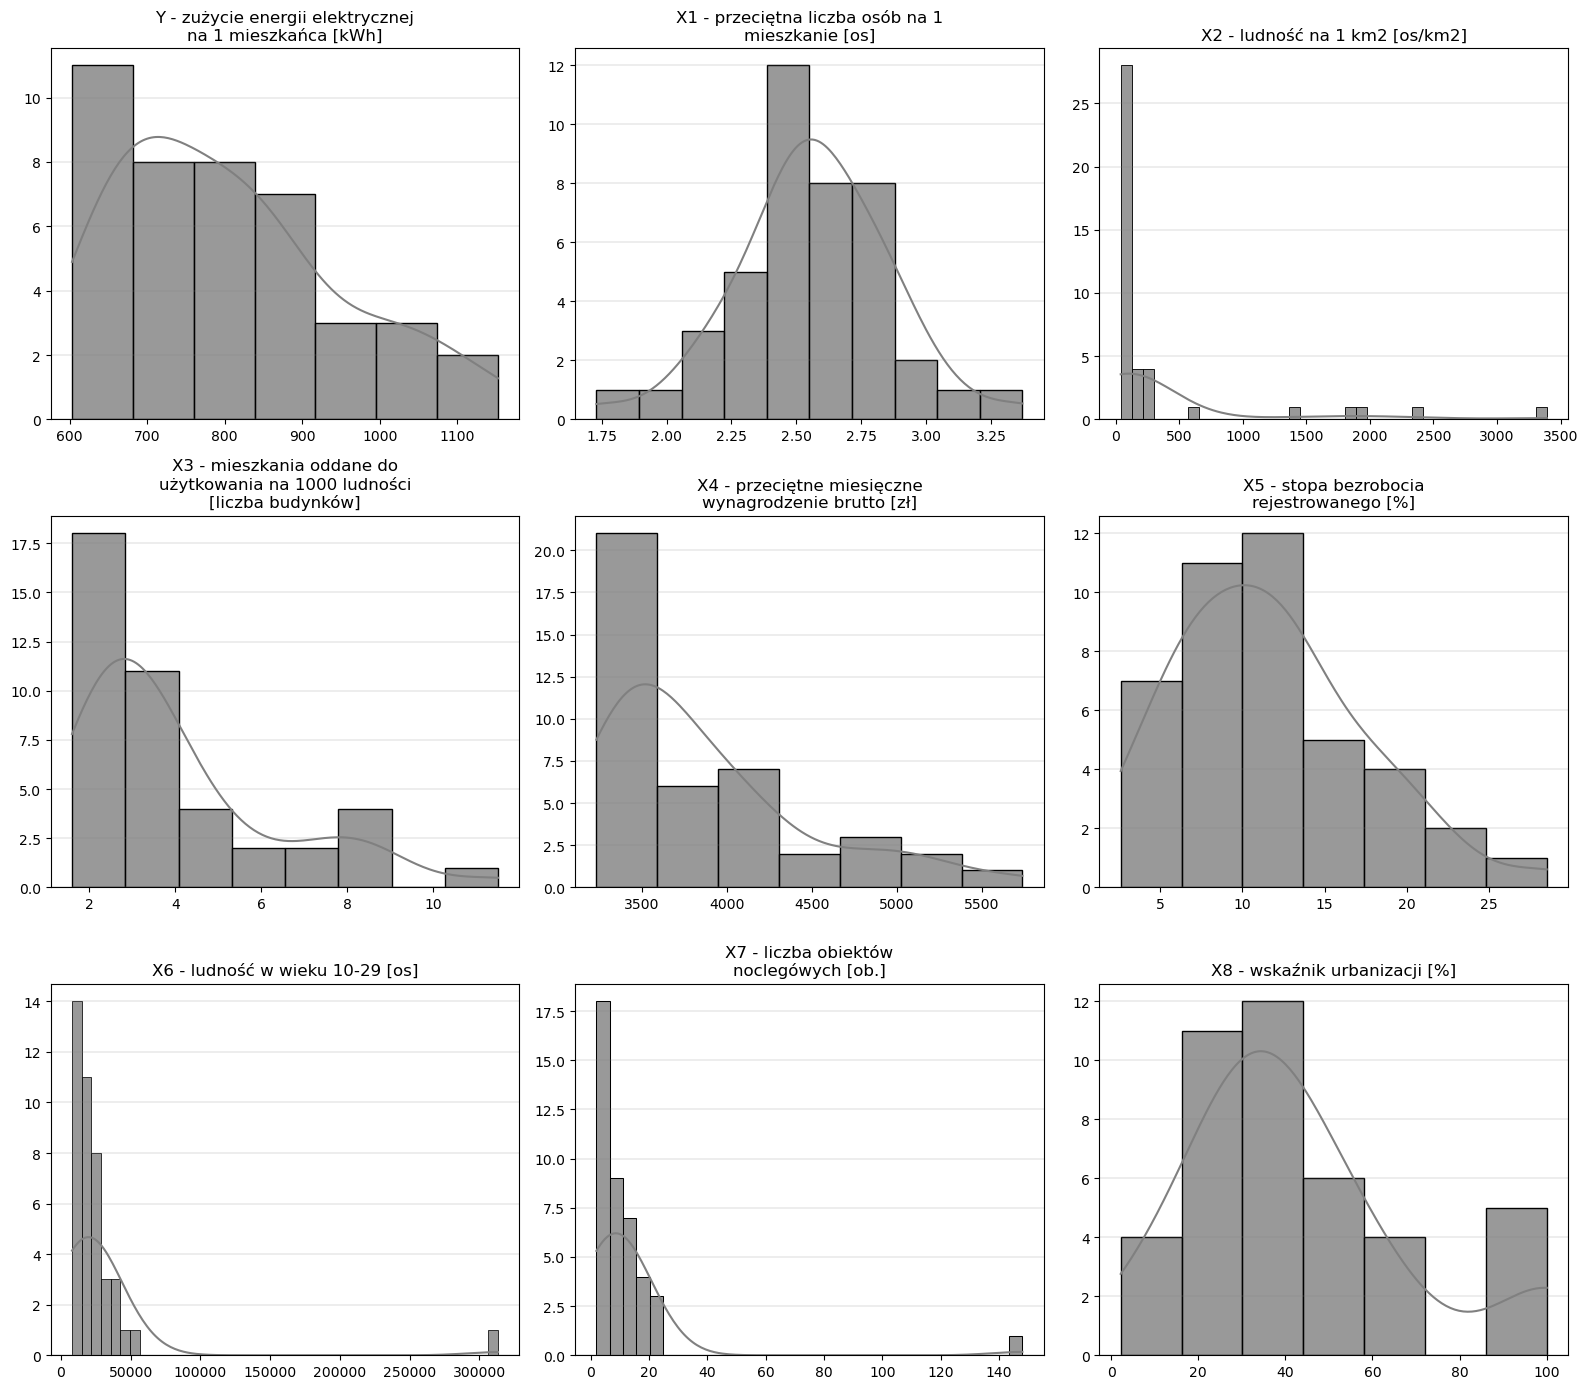

In [27]:
import textwrap

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
axes = axes.flatten()
for ax, col, var_desc in zip(axes, data.columns, vars_descrpition):
    sns.histplot(data[col], ax=ax, edgecolor='black', alpha=0.8, color='gray', kde=True)
    title = f"{col} - {var_desc}"
    ax.set_title( "\n".join(textwrap.wrap(title, width=32)) )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(linewidth=0.2, axis='y', color='gray')
plt.tight_layout()
plt.show()

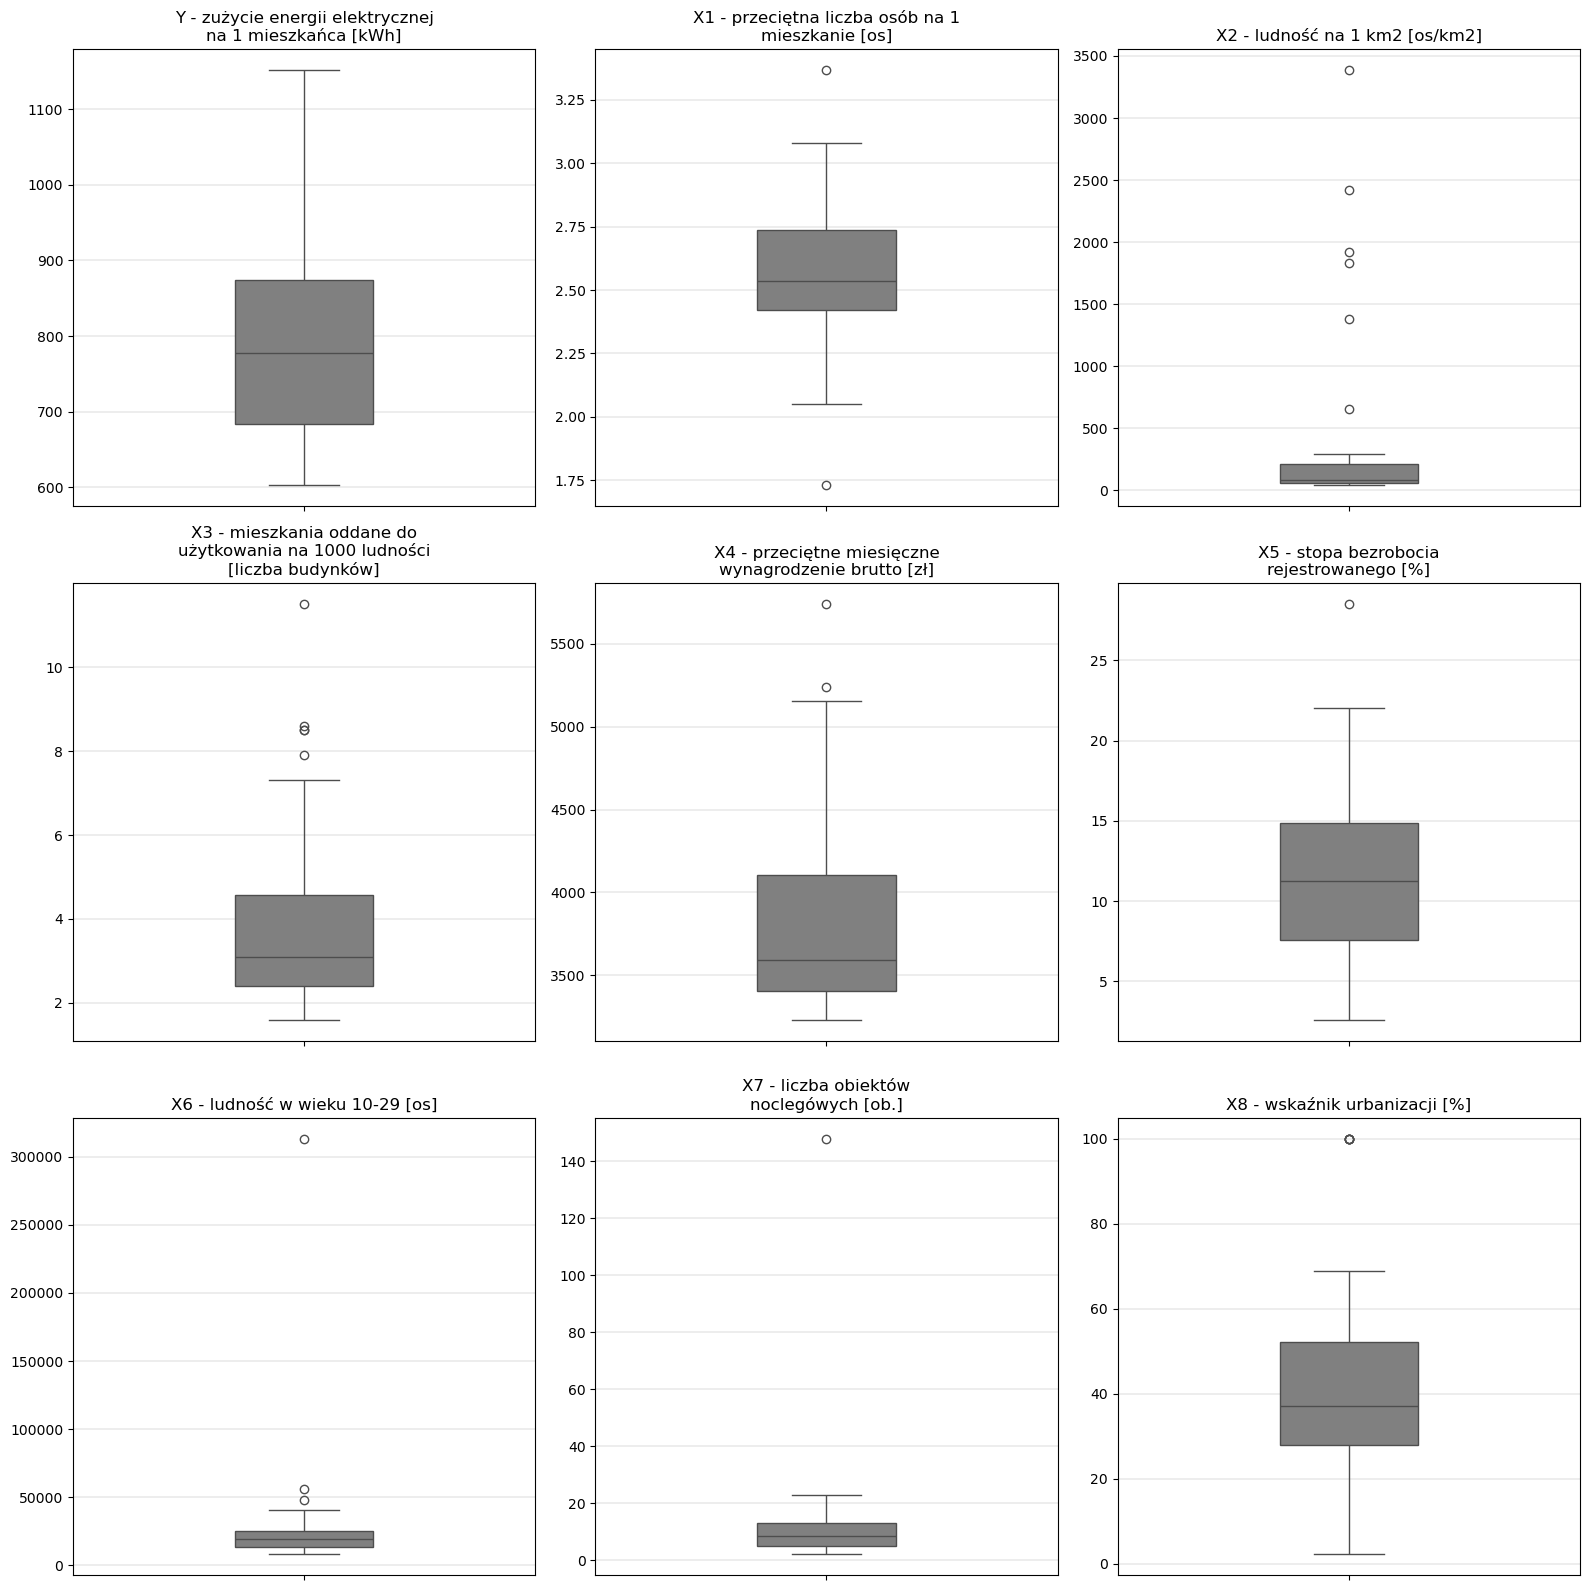

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
axes = axes.flatten()
for ax, col, var_desc in zip(axes, data.columns, vars_descrpition):
    boxplot = sns.boxplot(data=data[col], ax=ax, width=0.3, color='gray')
    title = f"{col} - {var_desc}"
    ax.set_title( "\n".join(textwrap.wrap(title, width=32)) )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(linewidth=0.2, axis='y', color='gray')
plt.tight_layout()
plt.show()

In [2044]:
# def handle_outliers(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1

#     # dolna i górna granica boxplota
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df_bounds = pd.DataFrame(data=[lower_bound, upper_bound], 
#                              index=["lower_bound", "upper_bound"])
    
#     outlier_mask = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
#     outlier_observations = data[outlier_mask].index

#     return outlier_observations, df_bounds 

# outlier_observations, df_bounds = handle_outliers(data)

In [2045]:
# df_bounds

In [2046]:
# data[ data.index.isin(outlier_observations) ]

In [2047]:
import statsmodels.api as sm

X = sm.add_constant( data.drop(columns='Y') )
y = data['Y']

ols_regressor = sm.OLS(endog=y, exog=X).fit()
ols_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     2.787
Date:                Sat, 11 Oct 2025   Prob (F-statistic):             0.0179
Time:                        02:04:39   Log-Likelihood:                -256.79
No. Observations:                  42   AIC:                             531.6
Df Residuals:                      33   BIC:                             547.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1455.4434    443.034      3.285      0.002     554.083    2356.804
X1          -277.2670    148.634     -1.865      0.071    -579.666      25.132
X2            -0.0258      0.064     -0.406      0.688      -0.155       0.104
X3            32.0475     13.327      2.405      0.022       4.933      59.162
X4             0.0319      0.056      0.572      0.571      -0.081       0.145
X5            -1.8985      4.632     -0.410      0.685     -11.322       7.525
X6             0.0029      0.003      1.047      0.303      -0.003       0.009
X7            -6.4600      6.633     -0.974      0.337     -19.954       7.035
X8            -3.8209      2.131     -1.793      0.082      -8.157       0.516
==============================================================================
Omnibus:                        3.063   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.512
Skew:                           0.599   Prob(JB):                        0.285
Kurtosis:                       2.964   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$
Macierz \, H: \; H = X\left( X^{T}X \right)^{-1}X^{T}
$$

In [2048]:
X_array = np.array(X)
"""@ operator mnożenia macierzowego"""
H = X_array @ np.linalg.inv(X_array.T @ X_array) @ X_array.T
np.set_printoptions(threshold=np.inf)
H, H.shape

(array([[ 0.07,  0.02,  0.04, -0.  ,  0.  ,  0.04, -0.02,  0.04,  0.03,
          0.12,  0.01,  0.03,  0.03, -0.02,  0.05,  0.04,  0.02,  0.01,
          0.07,  0.03,  0.01,  0.05,  0.01, -0.01,  0.01,  0.09,  0.02,
          0.01,  0.06,  0.  ,  0.03,  0.05, -0.07,  0.06,  0.04,  0.04,
         -0.01,  0.01, -0.02, -0.03,  0.05, -0.02],
        [ 0.02,  0.17,  0.02,  0.05, -0.03, -0.01,  0.  ,  0.03, -0.06,
          0.11,  0.01,  0.07,  0.04, -0.02, -0.06,  0.06,  0.1 , -0.06,
          0.  ,  0.02,  0.08,  0.11, -0.03, -0.01,  0.  , -0.07,  0.07,
          0.06,  0.06,  0.07, -0.04,  0.01, -0.01,  0.05,  0.  ,  0.03,
          0.12,  0.05,  0.09,  0.02, -0.14,  0.01],
        [ 0.04,  0.02,  0.06,  0.  ,  0.03,  0.03,  0.03,  0.  , -0.01,
          0.01,  0.01,  0.03,  0.01,  0.01,  0.11,  0.03,  0.04, -0.01,
          0.07,  0.02,  0.02,  0.06, -0.01,  0.  ,  0.06,  0.06,  0.02,
          0.05,  0.  ,  0.01,  0.04,  0.  ,  0.04,  0.06,  0.04,  0.04,
         -0.02,  0.01, -0.  , -0

In [2049]:
np.array(ols_regressor.resid), H.diagonal()

c:\Users\Radek\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(array([ -39.26,  -72.46,  -28.71, -119.43,   68.05,   47.98, -192.24,
         -95.92,  287.57,  -58.26,   89.67,   48.52, -144.35, -123.76,
         -39.67,   31.48,  223.78,   94.78,  -38.7 , -160.15,   56.33,
         136.22,   60.34, -139.13,  -97.28, -136.41,  -36.15,  105.37,
         -45.57,  188.34,  117.54,  -21.53,  -13.03,  -96.84,  220.74,
          -5.19,   -7.78,   25.32,  -85.08,   30.22,  -44.89,    9.54]),
 array([0.07, 0.17, 0.06, 0.09, 0.16, 0.11, 0.34, 0.37, 0.21, 0.36, 0.09,
        0.11, 0.15, 0.21, 0.36, 0.07, 0.15, 0.22, 0.17, 0.04, 0.22, 0.14,
        0.21, 0.11, 0.18, 0.23, 0.08, 0.16, 0.13, 0.33, 0.21, 0.13, 0.46,
        0.15, 0.05, 0.07, 0.17, 0.32, 0.28, 0.32, 0.6 , 0.97]))

##### Identyfikacja obserwacji nietypowych

In [2050]:
table = pd.DataFrame(data={ 'ei': np.array(ols_regressor.resid),
                            'hi': H.diagonal() },
                     index=np.arange( 1, len(H.diagonal()) + 1 ))
k = 8
n = len(data)
h_crit = 2 * (k + 1) / n
table['is_leverage'] = np.where(table['hi'] >= h_crit, '* Yes *', 'No')
table['ei * hi / (1 - hi)'] = table['ei'] * table['hi'] / (1 - table['hi'])

table['si'] = 0.0
for i in data.index:
    table.loc[i, 'si'] = table.loc[ table.index != i, 'ei'].std()
table['ri'] = table['ei'] / (table['si'] * np.sqrt(1 - table['hi']))
table['is_influence'] = np.where(table['ri'] > 2, '* Yes *', 'No')
table['DIFFITS'] = table['ri'] * np.sqrt( table['hi'] / (1 - table['hi']) )
diffits_crit = 2 * np.sqrt((k + 1) / (n - k - 1))
table['is_unusual'] = np.where( abs(table['DIFFITS']) > diffits_crit, '* Yes *', 'No' )

table

,ei,hi,is_leverage,ei * hi / (1 - hi),si,ri,is_influence,DIFFITS,is_unusual
1,-39.26,0.07,No,-3.06,111.93,-0.36,No,-0.10,No
2,-72.46,0.17,No,-15.10,111.50,-0.71,No,-0.33,No
3,-28.71,0.06,No,-1.70,112.01,-0.26,No,-0.06,No
4,-119.43,0.09,No,-11.98,110.46,-1.13,No,-0.36,No
5,68.05,0.16,No,12.59,111.57,0.66,No,0.29,No
6,47.98,0.11,No,5.65,111.84,0.45,No,0.16,No
7,-192.24,0.34,No,-99.83,107.80,-2.20,No,-1.58,* Yes *
8,-95.92,0.37,No,-56.44,111.05,-1.09,No,-0.84,No
9,287.57,0.21,No,78.17,102.22,3.17,* Yes *,1.65,* Yes *
10,-58.26,0.36,No,-32.12,111.71,-0.65,No,-0.48,No


In [1720]:
# !pip install mlxtend

##### Dobór zmiennych metodą regresji wstecz

In [1281]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

X_v1 = data.drop(columns='Y')
y_v1 = data['Y']

def backward_regression(X, y, n_features):
    linear_reg = LinearRegression()
    forward = SequentialFeatureSelector(
        linear_reg,
        k_features=n_features,
        forward=False,
        verbose=2,
        scoring="neg_mean_squared_error"
    )

    feature_selector = forward.fit(X, y)

    return feature_selector

sf_v1 = backward_regression(X_v1, y_v1, 3)


[2025-10-11 00:03:53] Features: 7/3 -- score: -18078.520932769712
[2025-10-11 00:03:53] Features: 6/3 -- score: -16737.947610076684
[2025-10-11 00:03:53] Features: 5/3 -- score: -16788.598595199735
[2025-10-11 00:03:53] Features: 4/3 -- score: -16492.422211063404
[2025-10-11 00:03:53] Features: 3/3 -- score: -15941.533815874029

In [1282]:
print(sf_v1.k_feature_idx_)
print(sf_v1.k_feature_names_)

(0, 2, 7)
('X1', 'X3', 'X8')


In [1283]:
X_v1

,X1,X2,X3,X4,X5,X6,X7,X8
Observation No.,,,,,,,,
1,2.72,52.50,3.00,3461.85,10.10,9028,5,23.60
2,2.50,85.20,1.90,3840.19,13.10,22173,11,52.60
3,2.82,84.70,4.00,3776.65,11.30,29125,12,28.30
4,2.58,74.30,2.40,3394.93,18.50,10784,2,41.00
5,2.46,249.70,7.90,4352.30,4.40,20188,11,55.40
6,2.49,77.70,5.00,4133.21,3.30,23036,11,35.10
7,2.54,66.60,2.30,4930.22,12.80,14978,9,29.00
8,2.38,292.80,8.50,3975.24,10.90,24599,23,51.10
9,2.52,47.10,2.20,3567.68,12.60,8259,2,16.30


##### Dopasowanie modelu do danych 

In [ ]:
selected_features_v1 = sf_v1.k_feature_names_ # wybrane zmienne
X_sel_v1 = X_v1.loc[:, selected_features_v1]
print(X_sel_v1.head())

"""Dopisanie kolumny 1 do macierzy X"""
np.set_printoptions(precision=2, suppress=True)
X_sel_v1 = np.append(arr=np.ones( (len(data), 1) ).astype(int), values=X_sel_v1, axis=1)
X_sel_v1 = np.array( X_sel_v1 )
print()
print(X_sel_v1[:5])

"""Regresja liniowa dla dobranych zmiennych"""
ols_regressor_v1 = sm.OLS(endog=y_v1, exog=X_sel_v1).fit()
ols_regressor_v1.summary()

                  X1   X3    X8
Observation No.                
1               2.72 3.00 23.60
2               2.50 1.90 52.60
3               2.82 4.00 28.30
4               2.58 2.40 41.00
5               2.46 7.90 55.40

[[ 1.    2.72  3.   23.6 ]
 [ 1.    2.5   1.9  52.6 ]
 [ 1.    2.82  4.   28.3 ]
 [ 1.    2.58  2.4  41.  ]
 [ 1.    2.46  7.9  55.4 ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     7.409
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           0.000503
Time:                        00:03:53   Log-Likelihood:                -257.95
No. Observations:                  42   AIC:                             523.9
Df Residuals:                      38   BIC:                             530.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1418.1714    317.313      4.469      0.000     775.804    2060.539
x1          -232.0721    105.058     -2.209      0.033    -444.751     -19.393
x2            32.2717      8.716      3.703      0.001      14.628      49.916
x3            -3.5041      1.188     -2.949      0.005      -5.909      -1.099
==============================================================================
Omnibus:                        3.178   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.749
Skew:                           0.623   Prob(JB):                        0.253
Kurtosis:                       2.864   Cond. No.                         919.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model regresji dopasowany do danych po usunięciu obserwacji nietypowych

In [1285]:
data_cleaned = data[ ~data.index.isin(outlier_observations) ].reset_index()
data_cleaned.index = pd.RangeIndex(start=1, stop=31, step=1)
data_cleaned

,Observation No.,Y,X1,X2,X3,X4,X5,X6,X7,X8
1,1,752.05,2.72,52.50,3.00,3461.85,10.10,9028,5,23.60
2,2,639.31,2.50,85.20,1.90,3840.19,13.10,22173,11,52.60
3,3,769.93,2.82,84.70,4.00,3776.65,11.30,29125,12,28.30
4,4,630.91,2.58,74.30,2.40,3394.93,18.50,10784,2,41.00
5,6,959.41,2.49,77.70,5.00,4133.21,3.30,23036,11,35.10
6,7,638.91,2.54,66.60,2.30,4930.22,12.80,14978,9,29.00
7,9,1152.47,2.52,47.10,2.20,3567.68,12.60,8259,2,16.30
8,10,714.37,2.47,40.80,1.60,3369.26,8.20,7986,12,22.50
9,11,857.69,2.67,43.00,2.30,3359.63,19.10,11780,3,27.70
10,12,881.94,2.53,130.80,4.20,3600.49,6.80,36014,13,46.00


In [1286]:
X_v2 = data_cleaned.drop(columns='Y')
y_v2 = data_cleaned['Y']

sf_v2 = backward_regression(X_v2, y_v2, 2)


[2025-10-11 00:03:53] Features: 8/2 -- score: -20085.93861875082
[2025-10-11 00:03:53] Features: 7/2 -- score: -18418.433831873954
[2025-10-11 00:03:53] Features: 6/2 -- score: -16670.72876764096
[2025-10-11 00:03:53] Features: 5/2 -- score: -15726.829866665488
[2025-10-11 00:03:53] Features: 4/2 -- score: -14913.558564924548
[2025-10-11 00:03:53] Features: 3/2 -- score: -15666.08964013671
[2025-10-11 00:03:53] Features: 2/2 -- score: -15753.774968147778

In [ ]:
selected_features_v2 = sf_v2.k_feature_names_ # wybrane zmienne
X_sel_v2 = X_v2.loc[:, selected_features_v2]
print( X_sel_v2.head() )

"""Dopisanie kolumny 1 do macierzy X"""
X_sel_v2 = np.append(arr=np.ones( (len(data_cleaned), 1) ).astype(int), values=X_sel_v2, axis=1)
print()
print( X_sel_v2[:5] )

"""Regresja liniowa dla dobranych zmiennych"""
ols_regressor_v2 = sm.OLS(endog=y_v2, exog=X_sel_v2).fit()
ols_regressor_v2.summary()

     X2     X6
1 52.50   9028
2 85.20  22173
3 84.70  29125
4 74.30  10784
5 77.70  23036

[[    1.     52.5  9028. ]
 [    1.     85.2 22173. ]
 [    1.     84.7 29125. ]
 [    1.     74.3 10784. ]
 [    1.     77.7 23036. ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     4.296
Date:                Sat, 11 Oct 2025   Prob (F-statistic):             0.0240
Time:                        00:03:53   Log-Likelihood:                -185.39
No. Observations:                  30   AIC:                             376.8
Df Residuals:                      27   BIC:                             381.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        750.4551     59.046     12.710      0.000     629.302     871.608
x1             1.8249      0.623      2.927      0.007       0.546       3.104
x2            -0.0056      0.003     -1.683      0.104      -0.012       0.001
==============================================================================
Omnibus:                        7.000   Durbin-Watson:                   2.795
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                5.241
Skew:                           0.855   Prob(JB):                       0.0728
Kurtosis:                       4.127   Cond. No.                     5.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""